In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [95]:
from utils.logistics_functions import *
from utils.Run_LCA_model import Run_LCA_model

In [96]:
Energy_optimal = pd.read_csv('results/Energy_m3_optimal.csv')
Energy_grid = pd.read_csv('results/Energy_m3_grid.csv')
Energy_random = pd.read_csv('results/Energy_m3_random.csv')
GHG_optimal = pd.read_csv('results/GHG_m3_optimal.csv')
GHG_grid = pd.read_csv('results/GHG_m3_grid.csv')
GHG_random = pd.read_csv('results/GHG_m3_random.csv')
COST_optimal = pd.read_csv('results/COST_m3_optimal.csv')
COST_grid = pd.read_csv('results/COST_m3_grid.csv')
COST_random = pd.read_csv('results/COST_m3_random.csv')

In [98]:
scenario = 'optimal'
if scenario == 'optimal':
    Result_Energy_m3 = Energy_optimal
    Result_GHG_m3 = GHG_optimal
    Result_COST_m3 = COST_optimal
if scenario == 'grid':
    Result_Energy_m3 = Energy_grid
    Result_GHG_m3 = GHG_grid
    Result_COST_m3 = COST_grid
if scenario == 'random':
    Result_Energy_m3 = Energy_random
    Result_GHG_m3 = GHG_random
    Result_COST_m3 = COST_random

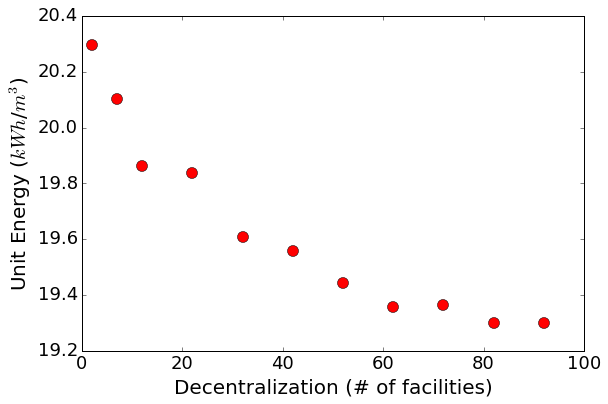

In [99]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

In [100]:
Result_Energy_m3

,Unnamed: 0,Resin manufacturing,Catridge manufacturing,Tank manufacturing,Pump operation,Pump manufacturing,Acid manufacturing,Logistics_regen,trucks manufacturing,Bottling,Material transport,Logistics_collect,n_facilities,sum
0,0,3.494549,0.176117,0.000558,0.000046,0.000268,13.134661,2.621150,0.297620,0.017681,0.551223,0.000895,2,20.294770
1,0,3.494549,0.176117,0.000573,0.000162,0.000938,13.134661,2.420892,0.300368,0.017681,0.551226,0.004415,7,20.101582
2,0,3.494549,0.176117,0.000582,0.000278,0.001608,13.134661,2.176779,0.303115,0.017681,0.551228,0.005587,12,19.862186
3,0,3.494549,0.176117,0.000596,0.000510,0.002948,13.134661,2.144642,0.305862,0.017681,0.551233,0.008983,22,19.837783
4,0,3.494549,0.176117,0.000608,0.000741,0.004288,13.134661,1.907855,0.309525,0.017681,0.551238,0.010663,32,19.607928
5,0,3.494549,0.176117,0.000618,0.000973,0.005629,13.134661,1.846810,0.316851,0.017681,0.551244,0.013466,42,19.558599
6,0,3.494549,0.176117,0.000627,0.001205,0.006969,13.134661,1.724936,0.319599,0.017681,0.551249,0.013871,52,19.441463
7,0,3.494549,0.176117,0.000634,0.001436,0.008309,13.134661,1.631691,0.326925,0.017681,0.551254,0.015427,62,19.358684
8,0,3.494549,0.176117,0.000640,0.001668,0.009649,13.134661,1.630793,0.329672,0.017681,0.551259,0.017634,72,19.364322
9,0,3.494549,0.176117,0.000646,0.001900,0.010989,13.134661,1.556498,0.335166,0.017681,0.551264,0.019459,82,19.298930


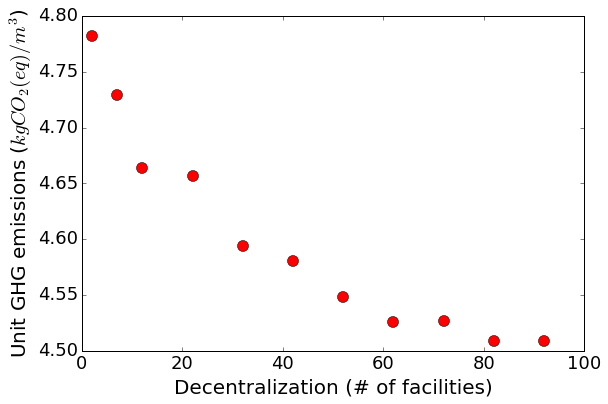

In [101]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

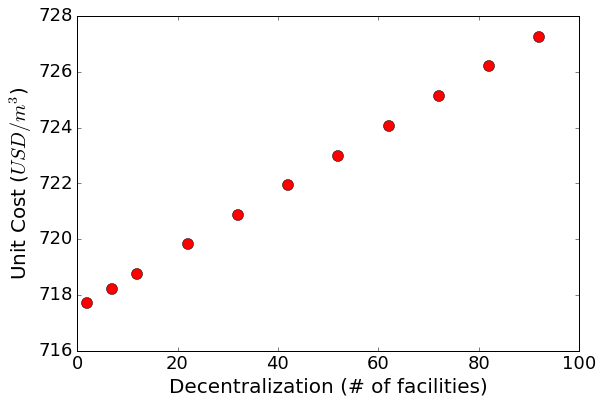

In [102]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_COST_m3["n_facilities"], Result_COST_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Cost ($USD/m^3$)', fontsize = 20)

In [103]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)
Result_COST_m3_plot = Result_COST_m3.drop('sum',1).drop('n_facilities',1)

In [104]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Material transport'] + Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing']+Result_Energy_m3_plot['Bottling'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Material transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing']+Result_GHG_m3_plot['Bottling'])
Result_COST_m3_plot['other'] = (Result_COST_m3_plot['Material transport'] + Result_COST_m3_plot['Tank manufacturing'] +
                                 Result_COST_m3_plot['Pump manufacturing']+ Result_COST_m3_plot['Logistics_collect']+
                                Result_COST_m3_plot['Bottling'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing','Bottling'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing','Bottling'] , 1)
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing', 'Logistics_collect','Bottling'] , 1)

In [105]:
Result_Energy_m3_plot_low = (Result_Energy_m3_plot[0:1])
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_COST_m3_plot_low = Result_COST_m3_plot[0:1]
Result_Energy_m3_plot_high = (Result_Energy_m3_plot[-2:-1])
Result_GHG_m3_plot_high = Result_GHG_m3_plot[-2:-1]
Result_COST_m3_plot_high = Result_COST_m3_plot[-2:-1]

In [106]:
energy_errors_1 = Result_Energy_m3_plot_low.copy()
energy_errors_2 = Result_Energy_m3_plot_high.copy()
ghg_errors_2 = Result_GHG_m3_plot_high.copy()
ghg_errors_1 = Result_GHG_m3_plot_low.copy()
cost_errors_1 = Result_COST_m3_plot_low.copy()
cost_errors_2 = Result_COST_m3_plot_high.copy()

In [107]:
energy_errors_1[energy_errors_1>0] = 0 
energy_errors_1.other = 1.2
energy_errors_2[energy_errors_2>0] = 0 
energy_errors_2.other = 1.2
ghg_errors_1[ghg_errors_1>0] = 0 
ghg_errors_1.other = 0.2
ghg_errors_2[ghg_errors_2>0] = 0 
ghg_errors_2.other = 0.2
cost_errors_1[cost_errors_1>0] = 0 
cost_errors_1.other = 4.1
cost_errors_2[cost_errors_2>0] = 0 
cost_errors_2.other = 4.1

(array([ 0.,  1.,  2.,  3.,  4.,  5.]), <a list of 6 Text yticklabel objects>)

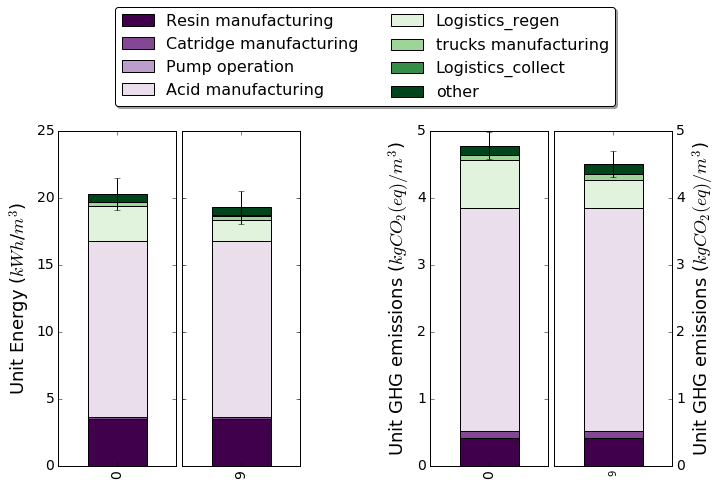

In [108]:
fig = plt.figure(figsize=(11, 6))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=energy_errors_1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0, 30)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, sharey=True, legend=False,colormap='PRGn', yerr=energy_errors_2)
#plt.ylim(0, 30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 4)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0, 2.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(2.6, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax,secondary_y=True, legend=False,colormap='PRGn', yerr=ghg_errors_2)
#plt.ylim(0, 2.5)
#fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text yticklabel objects>)

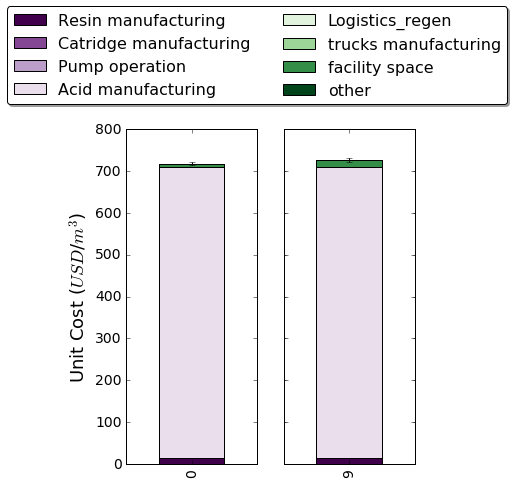

In [109]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,3, 1)
a=Result_COST_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(0, 42)
plt.ylabel('Unit Cost ($USD$/$m^3$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,3, 2)
c=Result_COST_m3_plot_high.plot(kind='bar', sharey=True, stacked = True,ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_2)
#plt.ylim(0, 42)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [110]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
ghg_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
ghg_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
ghg_random = np.array(GHG_random_log['logGHG'])

In [111]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(ghg_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(ghg_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(ghg_random , X_random_GHG)
results_random_GHG = model.fit()

In [112]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','isodistant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','isodistant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in power
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in power
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in power
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in power
C:\Users\Olga\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: divide by zero encountered in power


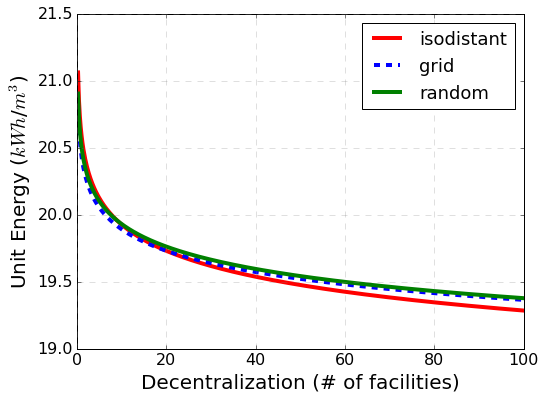

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal.plot( x='x', y='isodistant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

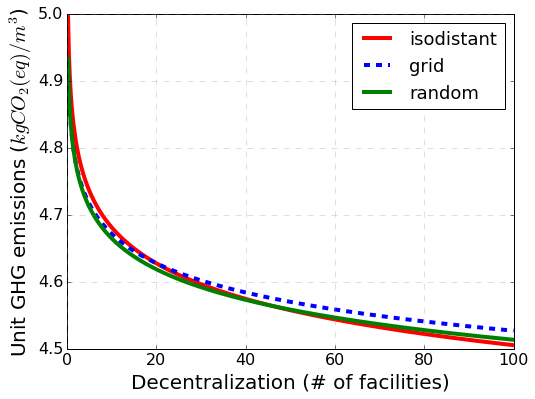

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal_GHG.plot( x='x', y='isodistant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(4.5, 5.1)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

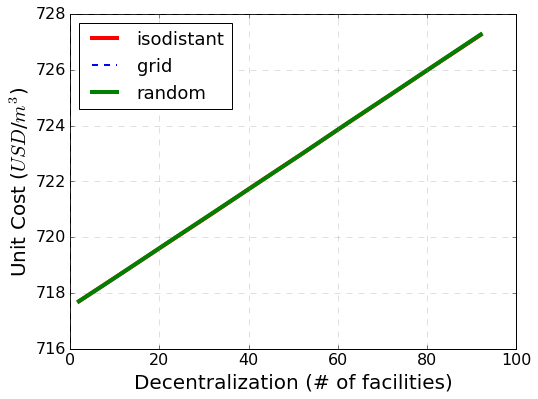

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = plt.plot( COST_optimal['n_facilities'], COST_optimal['sum'], c='r', linewidth=4, label = 'isodistant')
g = plt.plot( COST_grid['n_facilities'], COST_grid['sum'], c='b',linestyle='--', linewidth=2, label = 'grid')
h = plt.plot( COST_random['n_facilities'], COST_random['sum'], c='g', linewidth=4, label = 'random')
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.legend(fontsize=18, loc='upper left')

In [116]:
cost_optimal = np.array(COST_optimal['sum'])
energy_optimal = np.array(Energy_optimal['sum'])
cost_grid = np.array(COST_grid['sum'])
energy_grid = np.array(Energy_grid['sum'])
cost_random = np.array(COST_random['sum'])
energy_random = np.array(Energy_random['sum'])
ghg_optimal_sum = np.array(GHG_optimal['sum'])
ghg_grid_sum = np.array(GHG_grid['sum'])
ghg_random_sum = np.array(GHG_random['sum'])

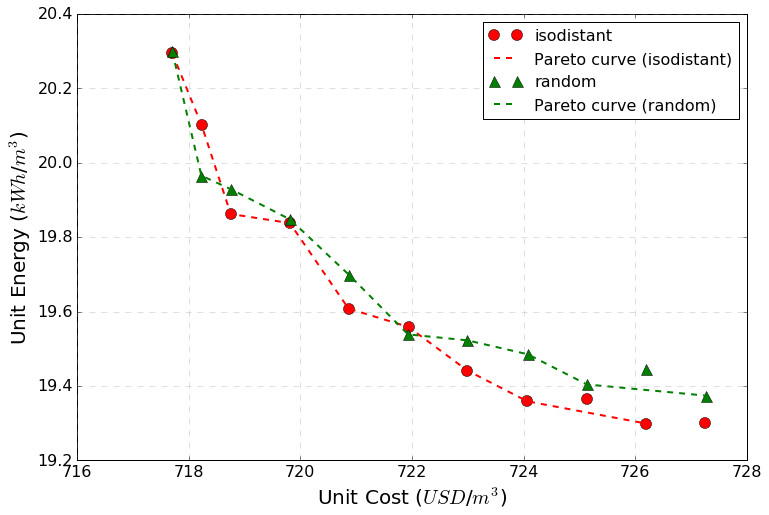

In [117]:
Xs_opt, Ys_opt = cost_optimal, energy_optimal
Xs_grid, Ys_grid = cost_grid, energy_grid
Xs_rand, Ys_rand = cost_random, energy_random
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(12, 8))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11, label = 'isodistant')
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', label = 'Pareto curve (isodistant)', linewidth=2)
plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.ylim(7, 8.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '30 facilities') or (label == '90 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '35 facilities')  or (label == '90 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
plt.show()

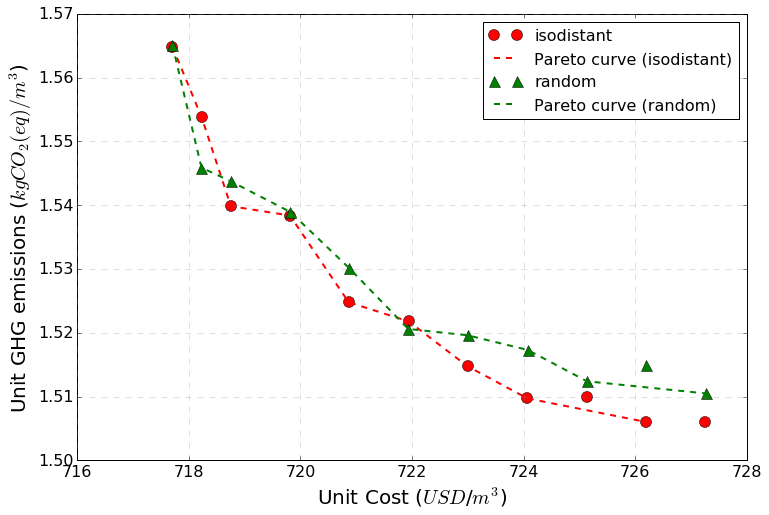

In [118]:
Xs_opt, Ys_opt = cost_optimal, ghg_optimal
Xs_grid, Ys_grid = cost_grid, ghg_grid
Xs_rand, Ys_rand = cost_random, ghg_random
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(12, 8))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11, label = 'isodistant')
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', label = 'Pareto curve (isodistant)', linewidth=2)
plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.ylim(7, 8.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '35 facilities') or (label == '70 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, -30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '35 facilities') or (label == '80 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
plt.show()